In [1]:
library(CellChat)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [ ]:
data_folder <- '../../data/'

In [ ]:
output_folder <- '../../results/Benchmarking/'

In [3]:
options(stringsAsFactors = FALSE)
interaction_input <- read.csv(file = paste0(data_folder, '/CellChat-inputs/Celegans-interaction_input.csv'), row.names = 1, stringsAsFactors=FALSE)
complex_input <- read.csv(file = paste0(data_folder, '/CellChat-inputs/Celegans-complex_input.csv'), row.names = 1, stringsAsFactors=FALSE)
cofactor_input <- read.csv(file = paste0(data_folder, '/CellChat-inputs/Celegans-cofactor_input.csv'), row.names = 1, stringsAsFactors=FALSE)
geneInfo <- read.csv(file = paste0(data_folder, '/CellChat-inputs/Celegans-geneinfo.csv'), row.names = 1, stringsAsFactors=FALSE)

interaction_input[is.na(interaction_input)] <- ""    
complex_input[is.na(complex_input)] <- "" 
cofactor_input[is.na(cofactor_input)] <- "" 
geneInfo[is.na(geneInfo)] <- "" 

CellChatDB <- list()
CellChatDB$interaction <- interaction_input
CellChatDB$complex <- complex_input
CellChatDB$cofactor <- cofactor_input
CellChatDB$geneInfo <- geneInfo

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Celegans-complex_input.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Celegans-cofactor_input.csv'”


In [4]:
CellChatDB.use <- CellChatDB

In [5]:
#showDatabaseCategory(CellChatDB)
dplyr::glimpse(CellChatDB$interaction)

Rows: 245
Columns: 11
$ interaction_name   <chr> "ARF-1.2_PLD-1", "DAF-7_SMA-6", "SRP-6_F14B4.1", "A…
$ pathway_name       <chr> "Cell adhesion", "TGF-B signaling", "Wnt signaling"…
$ ligand             <chr> "arf-1.2", "daf-7", "srp-6", "adm-2", "adm-2", "let…
$ receptor           <chr> "pld-1", "sma-6", "F14B4.1", "pat-3", "pat-2", "sdn…
$ agonist            <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ antagonist         <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ evidence           <chr> "KEGG: Orthology, protein-protein interaction (STRI…
$ annotation         <chr> "Cell-Cell Contact", "Secreted Signaling", "Secrete…
$ interaction_name_2 <chr> "arf-1.2_pld-1", "daf-7_sma-6", "srp-6_F14B4.1", "a…


In [33]:
rnaseq <- read.csv(file = paste0(data_folder, '/CellChat-inputs/Celegans_RNASeq-log2.csv'), row.names = 1, check.names = FALSE, stringsAsFactors = F)

num_data <- data.frame(data.matrix(rnaseq))
numeric_columns <- sapply(num_data,function(x){mean(as.numeric(is.na(x)))<0.5})
final_data <- data.frame(num_data[,numeric_columns], rnaseq[,!numeric_columns])

In [22]:
celltype <- c(colnames(rnaseq))
metadata <- data.frame(row.names = c(colnames(rnaseq)), celltype)

In [35]:
cellchat <- createCellChat(object = as.matrix(final_data), meta = metadata, group.by = "celltype")
cellchat@DB <- CellChatDB.use

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  Am/PH_sheath_cells Body_wall_muscle Canal_associated_neurons Cholinergic_neurons Ciliated_sensory_neurons Coelomocytes Excretory_cells GABAergic_neurons Germline Intestinal/rectal_muscle Intestine Non-seam_hypodermis Other_interneurons Oxygen_sensory_neurons Pharyngeal_epithelia Pharyngeal_gland Pharyngeal_muscle Pharyngeal_neurons Rectum Seam_cells Somatic_gonad_precursors Touch_receptor_neurons 


In [36]:
groupSize <- as.numeric(table(cellchat@idents))

In [37]:
cellchat <- subsetData(cellchat)

Issue identified!! Please check the official Gene Symbol of the following genes:  
 A 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 B 


In [41]:
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

In [45]:
cellchat <- computeCommunProb(cellchat, raw.use = TRUE, nboot=1000)

In [46]:
df.net <- subsetCommunication(cellchat)

In [48]:
cellchat <- aggregateNet(cellchat)

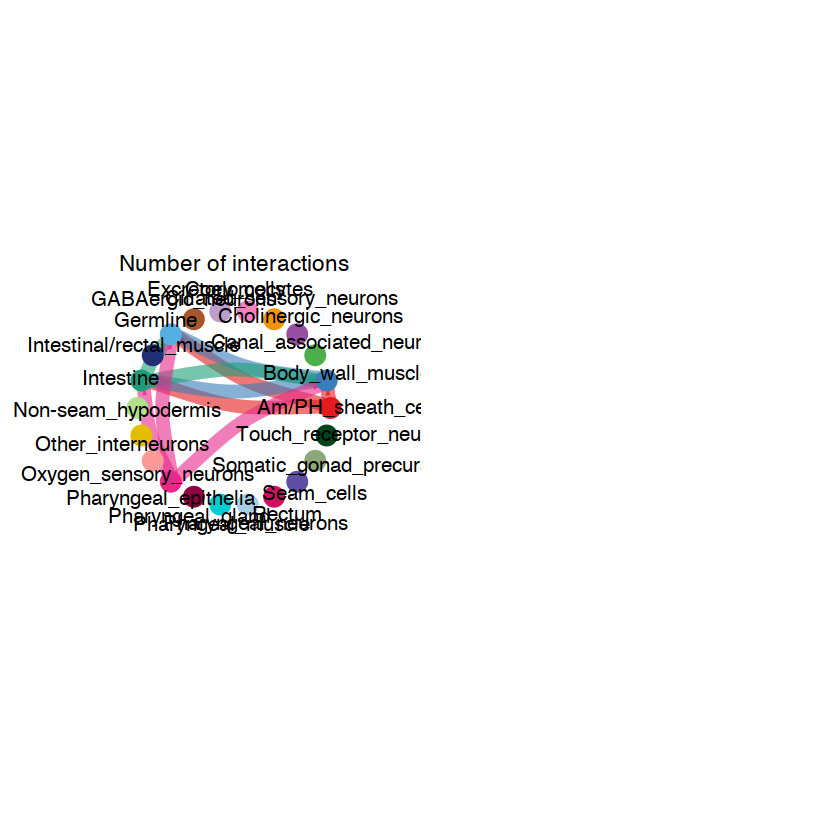

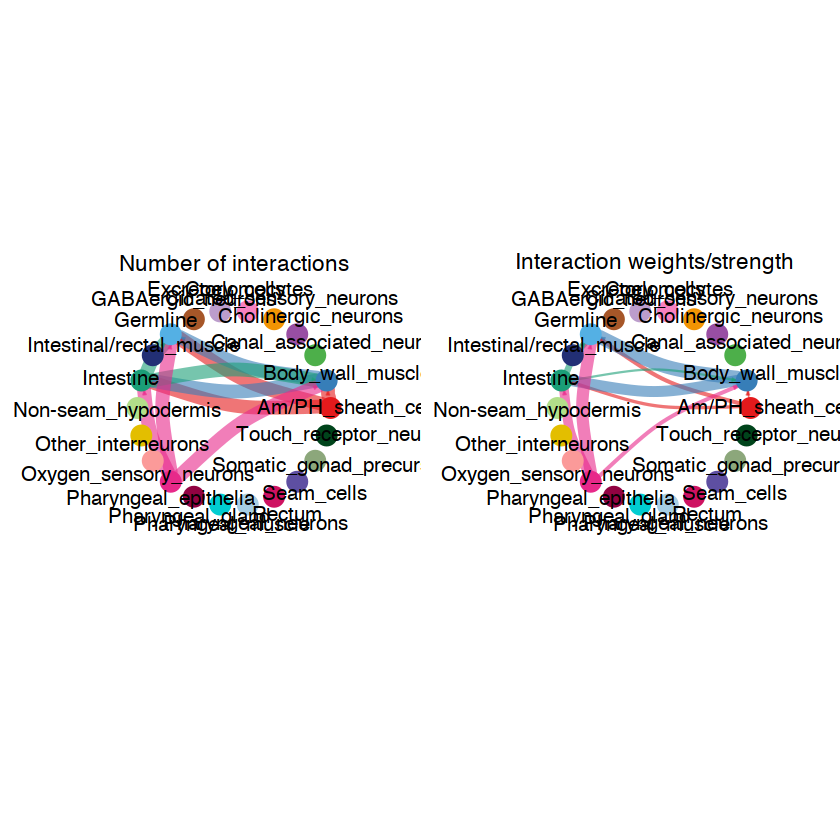

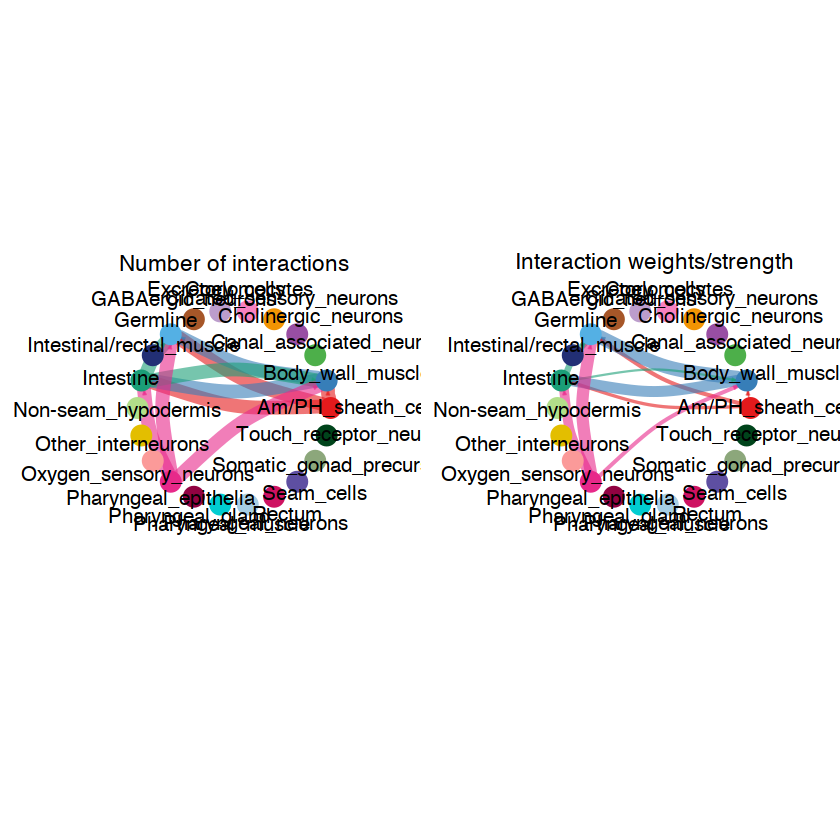

In [49]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

In [52]:
write.csv(cellchat@net$weight, file = paste0(data_folder, "/Benchmarking/CCI-Matrix-CellChat-weight.csv"))
write.csv(cellchat@net$count, file = paste0(data_folder, "/Benchmarking/CCI-Matrix-CellChat-count.csv"))

In [ ]:
write.csv(cellchat@net$weight, file = paste0(output_folder, "/CCI-Matrix-CellChat-weight.csv"))
write.csv(cellchat@net$count, file = paste0(output_folder, "/CCI-Matrix-CellChat-count.csv"))